<h1>Daftar Pustaka</h1>
<!--Penulisan Abel Kristanto Widodo-->

Hallo semua! Kali ini kita akan berfokus dalam pengembangan pembelajaran di Project ETL with Pandas

1. <a href='#Pengenalan'>Pengenalan Informasi</a>
2. <a href='#Library-yang-digunakan'>Library yang digunakan</a>
3. <a href='#Extra-data'>Extra data</a>
4. <a href='#Transform-data'>Transform data</a>
5. <a href='#Load-data'>Load data</a>

<p>Mari kita mulai dari bagian pertama ya! Persiapkan dirimu dan jika ada pertanyaan boleh <b>raise hand ya</b> &#9996</p>

## Pengenalan

ETL merupakan tahapan untuk mengubah data dari raw menjadi layak digunakan untuk menjadi data warehouse (data siap dianalisis). Kali ini kita akan membedah dataset yang berisi **5000 data** dengan berisikan:

1. participant_id: ID dari peserta/partisipan hackathon. Kolom ini bersifat unique sehingga antar peserta pasti memiliki ID yang berbeda
2. first_name: nama depan peserta
3. last_name: nama belakang peserta
4. birth_date: tanggal lahir peserta
5. address: alamat tempat tinggal peserta
6. phone_number: nomor hp/telepon peserta
7. country: negara asal peserta
8. institute: institusi peserta saat ini, bisa berupa nama perusahaan maupun nama universitas
9. occupation: pekerjaan peserta saat ini
10. register_time: waktu peserta melakukan pendaftaran hackathon dalam second

**GOAL**
1. Melakukan manipulasi data
2. Membuat variabel baru yang berguna untuk analisis
3. Menyimpan di warehouse

## Library yang digunakan

Dalam proses ETL ini ada beberapa library yang berguna untuk melakukan manipulasi data. Saat ini kita akan mencoba dengan library berikut:

In [1]:
# Jika belum instal
# !pip3 install pandas
# !pip3 install regex

import pandas as pd
import re

## Extract data

Disini kita akan melihat data raw yang kita miliki untuk dilakukan manipulasi dan selanjutnya disimpan dalam warehouse

In [2]:
# read_csv() -- digunakan karena data berupa .csv
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqthon-participants.csv')

# menampilkan isi data sekilas
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09


Bagaimana menurut teman-teman tentang datanya?

## Transform data

Disini kita akan melakukan manipulasi/transformasi data, artinya merubah nilai menjadi nilai yang sesuai ataupun merubah format.

Regex dapat digunakan untuk menangkap pattern string yang dimiliki.

**Perhatikan Berikut ini!**

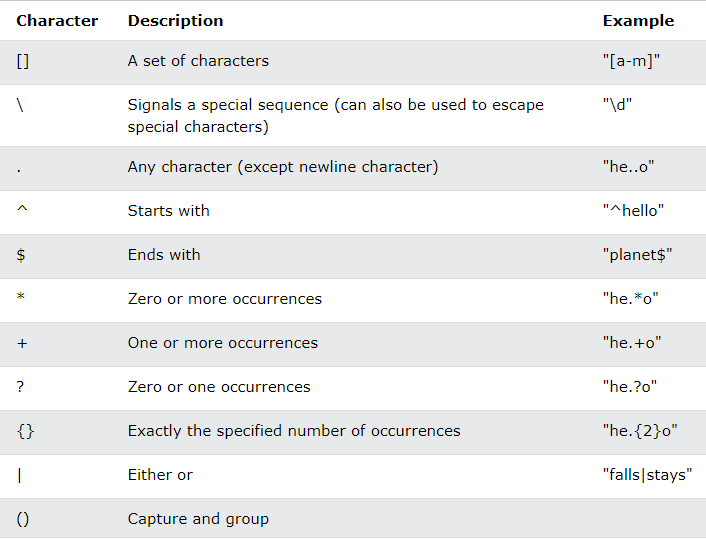

**Perhatikan Berikut ini!**

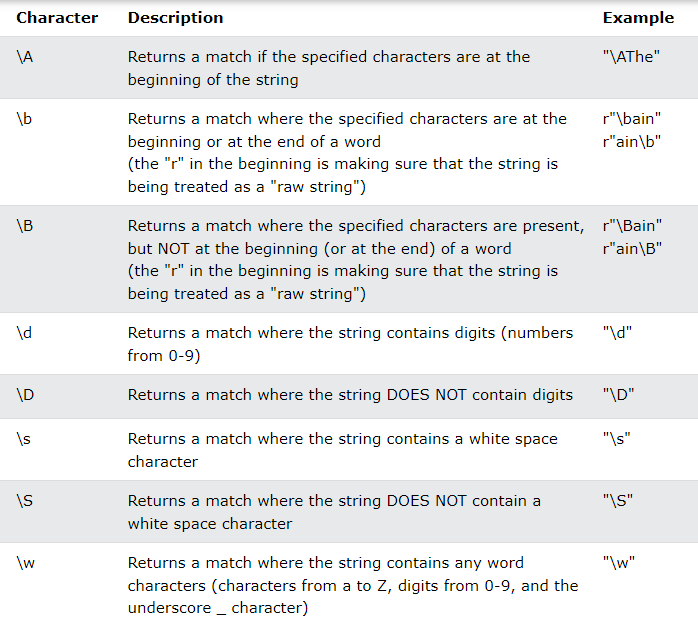

**Perhatikan Berikut ini!**

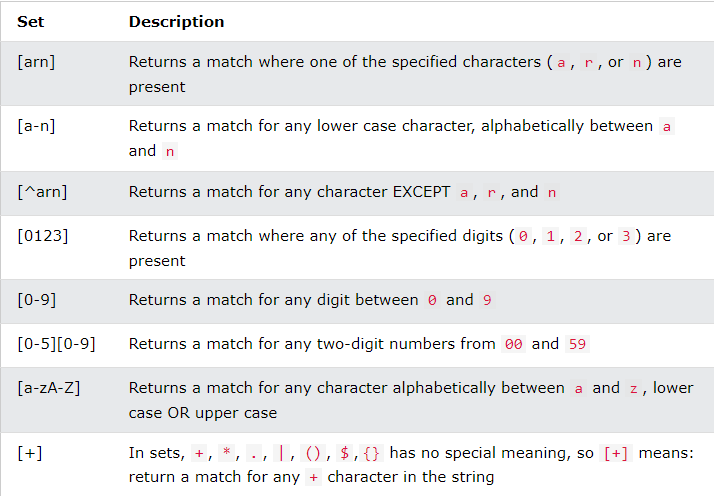

In [23]:
# 1. Ambil kode pos dari alamat peserta
data['postal_code'] = data.address.str.extract(r'(\d+)$')

# menampilkan perubahan
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074


In [36]:
# 2. Ambil kota dari address setelah nama jalan
data['city'] = data['address'].str.extract(r'(?<=\n)(\w.+)(?=,)')

# menampilkan perubahan
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code,city
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734,Medan
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434,Prabumulih
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739,Ambon
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156,Lubuklinggau
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074,Kediri


In [37]:
# 3. Ambil github profile dari first_name dan last_name
data['github_profile'] = 'https://github.com/' + data['first_name'].str.lower() + data['last_name'].str.lower()

# menampilkan perubahan
data.head()

,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code,city,github_profile
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734,Medan,https://github.com/citranurdiyanti
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434,Prabumulih,https://github.com/arissetiawan
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739,Ambon,https://github.com/corneliahandayani
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156,Lubuklinggau,https://github.com/solehrajasa
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074,Kediri,https://github.com/viviastuti


In [38]:
# 4. Ambil cleaned phone number
data['cleaned_phone_number'] = data['phone_number'].str.replace(r'^(\+62|62)', '0')
data['cleaned_phone_number'] = data['cleaned_phone_number'].str.replace(r'[()-]', '')
data['cleaned_phone_number'] = data['cleaned_phone_number'].str.replace(r'\s+', '')

# menampilkan perubahan
data.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7444/2054944241.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_phone_number'] = data['phone_number'].str.replace(r'^(\+62|62)', '0')
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7444/2054944241.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_phone_number'] = data['cleaned_phone_number'].str.replace(r'[()-]', '')
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7444/2054944241.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_phone_number'] = data['cleaned_phone_number'].str.replace(r'\s+', '')


,participant_id,first_name,last_name,birth_date,address,phone_number,country,institute,occupation,register_time,postal_code,city,github_profile,cleaned_phone_number
0,bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a,Citra,Nurdiyanti,05 Feb 1991,"Gg. Monginsidi No. 08\nMedan, Aceh 80734",(0151) 081 2706,Georgia,UD Prakasa Mandasari,Business Intelligence Engineer,1.617634e+09,80734,Medan,https://github.com/citranurdiyanti,01510812706
1,7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3,Aris,Setiawan,11 Jan 1993,"Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434",+62 (036) 461 7027,Korea Utara,Universitas Diponegoro,Frontend Engineer,1.617634e+09,09434,Prabumulih,https://github.com/arissetiawan,00364617027
2,19582d7f-b824-4fe5-a517-d5bf573fc768,Cornelia,Handayani,31 Jul 1993,"Jalan Kebonjati No. 0\nAmbon, SS 57739",089 833 6695,Komoro,UD Hardiansyah Puspasari,Business Analyst,1.617634e+09,57739,Ambon,https://github.com/corneliahandayani,0898336695
3,aeb6d817-25f3-4867-8a74-8d92e0a0f633,Soleh,Rajasa,04 Nov 1991,"Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156",+62 (418) 329-4756,Eritrea,Perum Tampubolon Yuliarti,DevOps Engineer,1.617634e+09,76156,Lubuklinggau,https://github.com/solehrajasa,04183294756
4,1fdabdd9-5444-4c97-87b2-fe8833ad0d27,Vivi,Astuti,22 Jan 2003,"Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...",0812511835,Aljazair,PT Hardiansyah Rahimah,Data Analyst,1.617634e+09,70074,Kediri,https://github.com/viviastuti,0812511835


In [39]:
# 4. Membuat nama team disusun first_name, last_name, country dan institute
def func(col):
    abbrev_name = "%s%s"%(col['first_name'][0],col['last_name'][0]) #Singkatan dari Nama Depan dan Nama Belakang dengan mengambil huruf pertama
    country = col['country']
    abbrev_institute = '%s'%(''.join(list(map(lambda word: word[0], col['institute'].split())))) #Singkatan dari value di kolom institute
    return "%s-%s-%s"%(abbrev_name,country,abbrev_institute)

data['team_name'] = data.apply(func, axis=1)

Ketentuan pembuatan email!
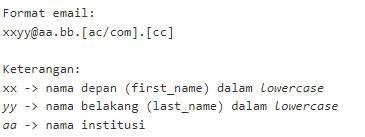

In [40]:
# 5. Membuat email dengan ketentuan
def func(col):
    first_name_lower = col['first_name'].lower()
    last_name_lower = col['last_name'].lower()
    institute = ''.join(list(map(lambda word: word[0], col['institute'].lower().split()))) #Singkatan dari nama perusahaan dalam lowercase

    if 'Universitas' in col['institute']:
        if len(col['country'].split()) > 1: #Kondisi untuk mengecek apakah jumlah kata dari country lebih dari 1
            country = ''.join(list(map(lambda word: word[0], col['country'].lower().split())))
        else:
            country = col['country'][:3].lower()
        return "%s%s@%s.ac.%s"%(first_name_lower,last_name_lower,institute,country)

    return "%s%s@%s.com"%(first_name_lower,last_name_lower,institute)

data['email'] = data.apply(func, axis=1)

In [41]:
# 6 Tanggal lahir dengan mengubah dari database
# database YYYY-MM-DD
data['birth_date'] = pd.to_datetime(data['birth_date'], format='%d %b %Y')

In [42]:
# 7 Tanggal Kompetisi dengan mengubah dari database
# database YYYY-MM-DD HH:mm:ss
data['register_at'] = pd.to_datetime(data['register_time'], unit='s')

## Load data

Disini kita akan melakukan load data hasil tranformasi dengan memperhatikan
1. Nama kolom
2. Tipe kolom
3. Menentukan primary key, unique key
4. Panjang kolom

In [ ]:
1. Cara read di pandas
2. Latihan regex